In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [3]:
HEIGHT = 32
WIDTH = 60

def create_image_data(folder):
    images_array = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        img = cv2.resize(img,(WIDTH,HEIGHT))
        img = img[:,int((WIDTH/2)-(HEIGHT/2)):int((WIDTH/2)+(HEIGHT/2))]
        images_array.append(img)        
    images_array = np.array(images_array)/255
    return images_array

def create_plot_1234(no, X_data, Y_data, pred_data):
    difference = np.abs(pred_data[no].reshape(HEIGHT,HEIGHT) - Y_data[no])
    plt.rcParams["figure.figsize"] = [18.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.subplot(1, 4, 1)
    plt.imshow(X_data[no])
    plt.title("Geometry")
    plt.subplot(1, 4, 2)
    plt.imshow(Y_data[no])
    plt.title("CFD")
    plt.subplot(1, 4, 3)
    plt.imshow(pred_data[no])
    plt.title("Autoencoder")
    plt.subplot(1, 4, 4)
    plt.imshow(difference)
    plt.title("|Difference|")
    plt.show()

def create_plot_13(no, X_data, pred_data):
    plt.rcParams["figure.figsize"] = [18.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.subplot(1, 2, 1)
    plt.imshow(X_data[no])
    plt.title("Geometry")
    plt.subplot(1, 2, 2)
    plt.imshow(pred_data[no])
    plt.title("Autoencoder")
    plt.show()

X_images = create_image_data("data_X")
Y_images = create_image_data("data_Y")


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(HEIGHT, HEIGHT, 1)))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1, (3,3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
model.fit(X_images, Y_images, epochs=2000, shuffle=True)

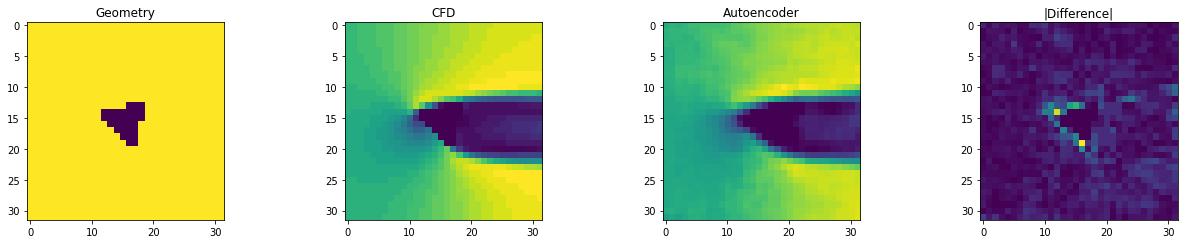

In [6]:
pred = model.predict(X_images)
create_plot_1234(39, X_images, Y_images, pred)

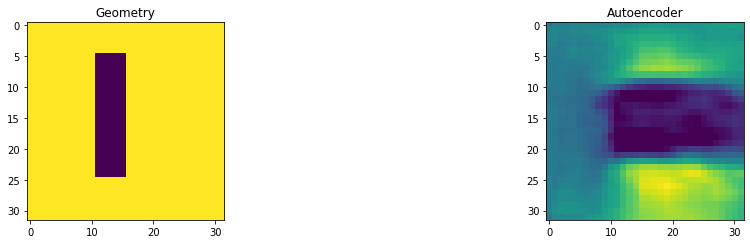

In [10]:
X_test = create_image_data("test_X")
pred_test = model.predict(X_test)

create_plot_13(4, X_test, pred_test)